In [4]:
# Installing the kaggle package
! pip install -q kaggle

In [1]:
# Create the kaggle API token to interact with your kaggle account

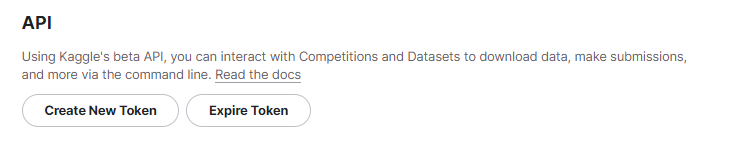

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshittrivedit","key":"fac5f0e4c35e5e47a77ac3d14bd14a4e"}'}

{}

In [3]:
#Series of commands to set-up for download

In [8]:
!mkdir ~/.kaggle # creating the .kaggle folder where the key should be placed

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!cp kaggle.json ~/.kaggle/ # move the key to the folder

In [10]:
# giving rw access

In [11]:
!chmod 600 ~/.kaggle/kaggle.json # sanity check if able to access kaggle

In [12]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25           9154        334  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           2532         69  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           4247         97  1.0              
evangower/premier-league-2022-2023                             Pr

In [13]:
!kaggle datasets download -d ananthr1/weather-prediction #providing the API command of a dataset

  0% 0.00/11.5k [00:00<?, ?B/s]
100% 11.5k/11.5k [00:00<00:00, 8.43MB/s]


In [14]:
!mkdir weather # creating a new directory weather 

In [15]:
!unzip weather-prediction.zip -d weather # unzip

Archive:  weather-prediction.zip
  inflating: weather/seattle-weather.csv  


In [16]:
import pandas as pd 

In [17]:
df=pd.read_csv("/content/weather/seattle-weather.csv")

In [18]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
df.shape

(1461, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [21]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [22]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [23]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# Data Visualization

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

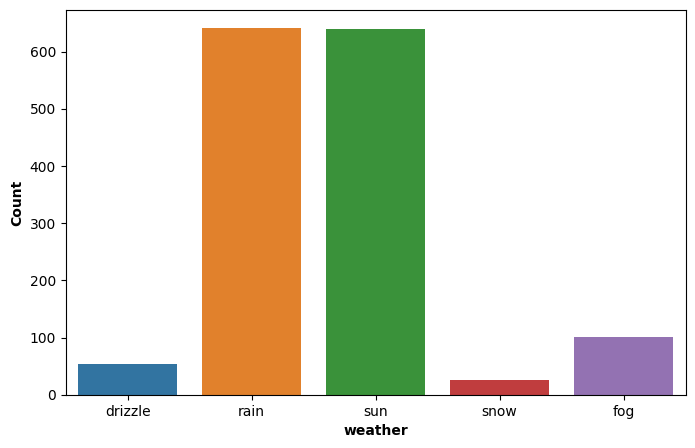

In [25]:

plt.figure(figsize=(8,5))
sns.countplot(x ='weather',data = df)
plt.xlabel("weather",fontweight='bold',size=10)
plt.ylabel("Count",fontweight='bold',size=10)
plt.show()

# checking for outliers

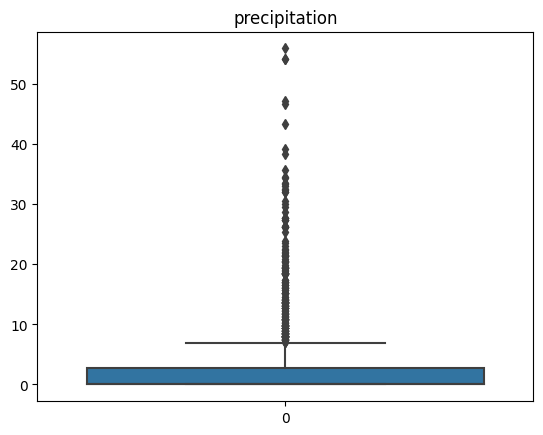

In [26]:
import seaborn as sns
sns.boxplot(df["precipitation"])
plt.title("precipitation")
plt.show()

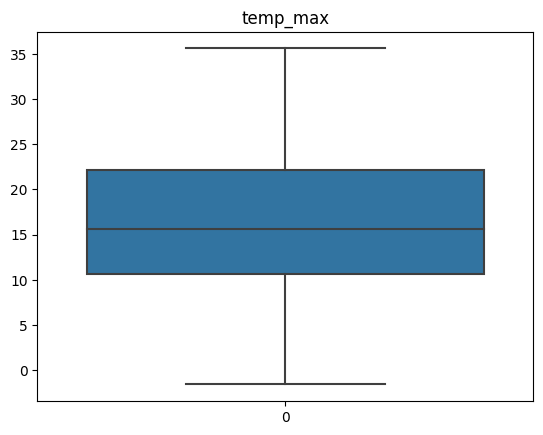

In [27]:
sns.boxplot(df["temp_max"])
plt.title("temp_max")
plt.show()

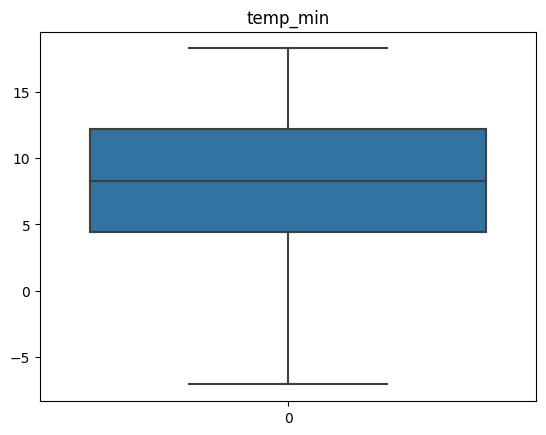

In [28]:

sns.boxplot(df["temp_min"])
plt.title("temp_min")
plt.show()

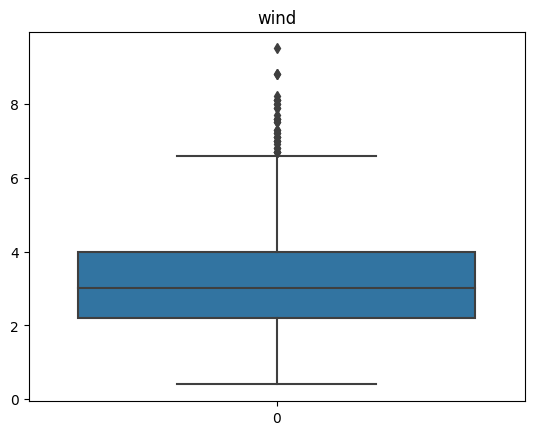

In [29]:
sns.boxplot(df["wind"])
plt.title("wind")
plt.show()

In [30]:
# here outliers represent natural variations in the population. so we will not remove

<Figure size 1400x800 with 0 Axes>

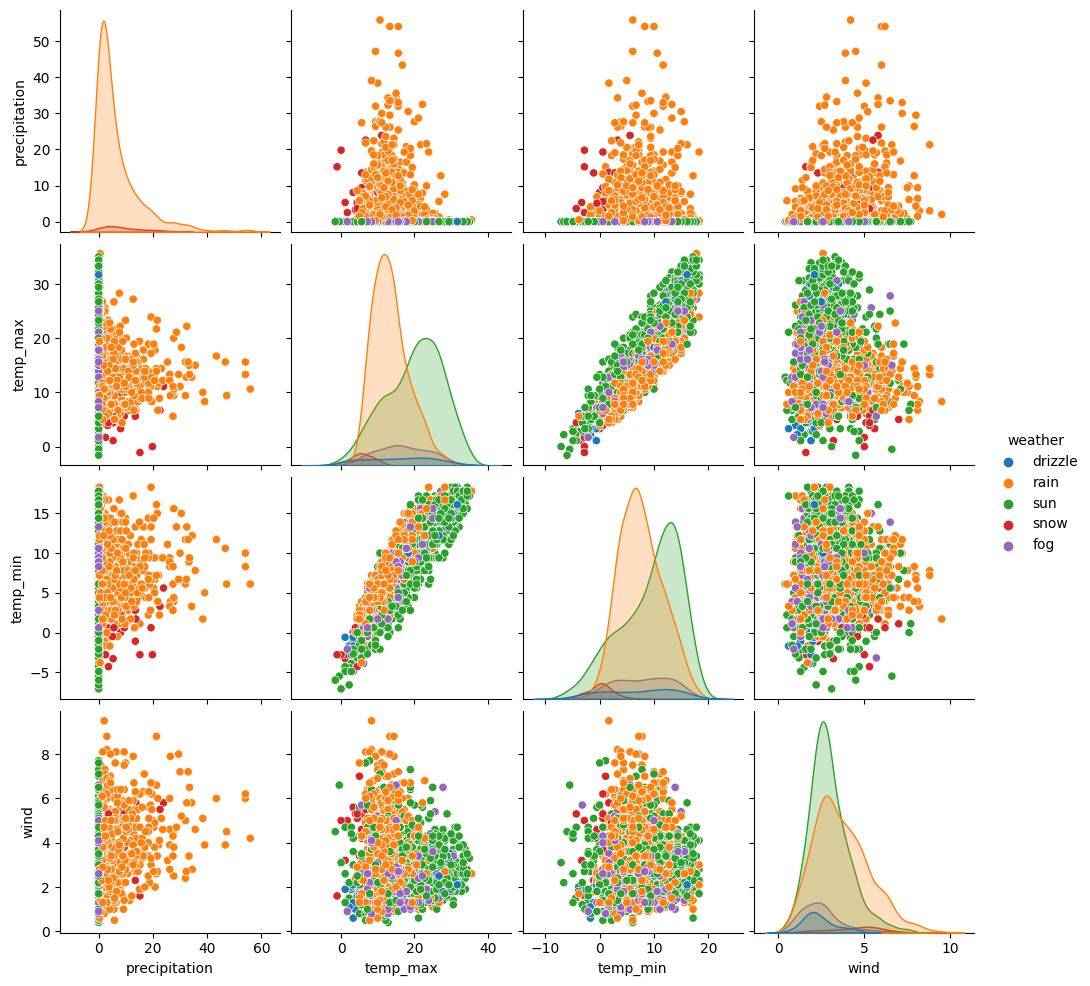

In [31]:
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date',axis=1),hue='weather',palette="tab10")
plt.show()

<ipython-input-32-afe5a742b984>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='temp_max',data=df,palette="crest")


<Figure size 1000x500 with 0 Axes>

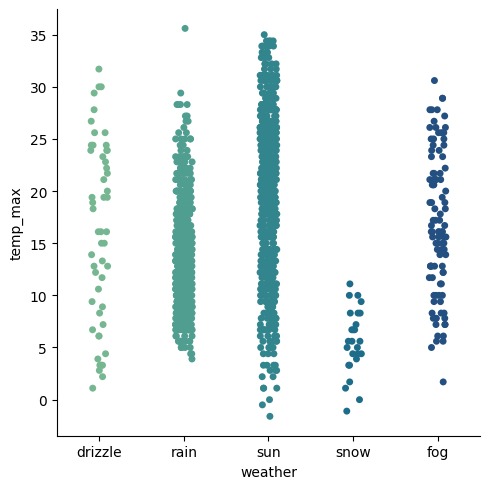

In [32]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=df,palette="crest")
plt.show()
# We can clearly observe when the temperature is high its sunny day

<ipython-input-33-3d47f36762a8>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='temp_min',data=df,palette = "RdBu")


<Figure size 1000x500 with 0 Axes>

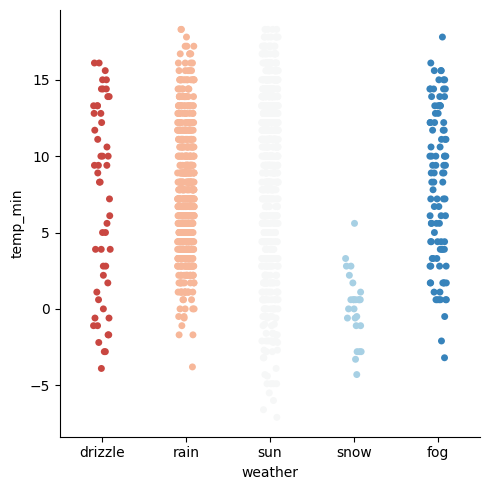

In [33]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=df,palette = "RdBu")
plt.show()
# As the temperature decreases there is more probability of having snow

<ipython-input-34-052241c94422>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='wind',data=df,palette = "magma")


<Figure size 1000x500 with 0 Axes>

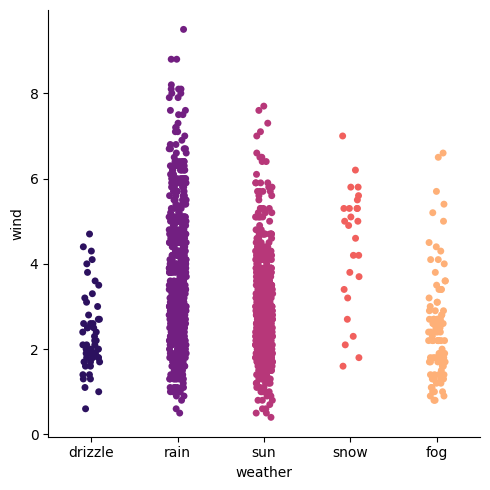

In [34]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=df,palette = "magma")
plt.show()
# we can see that increase in wind speed results in rain

<ipython-input-35-59ecdd92018e>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='weather',y ='precipitation',data=df,palette = "viridis")


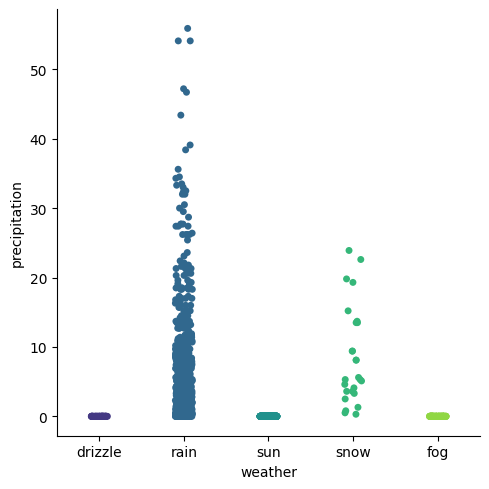

In [35]:
sns.catplot(x='weather',y ='precipitation',data=df,palette = "viridis")
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["weather"]=le.fit_transform(df["weather"])

In [37]:
df=df.drop(columns=["date"])

In [38]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


<Axes: >

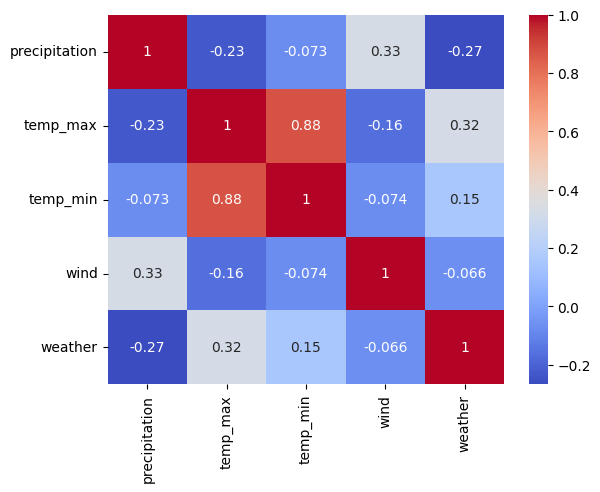

In [39]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [41]:
X= df.drop(columns=["weather"])
y=df["weather"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report

In [42]:
accuracy_score(y_test,y_pred)

0.7781569965870307

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   8],
       [  0,   0,   2,   0,  23],
       [  0,   0, 102,   0,  18],
       [  0,   0,   6,   1,   1],
       [  0,   0,   6,   0, 125]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.87      0.85      0.86       120
           3       1.00      0.12      0.22         8
           4       0.71      0.95      0.82       131

    accuracy                           0.78       293
   macro avg       0.52      0.39      0.38       293
weighted avg       0.70      0.78      0.72       293



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
score_card = pd.DataFrame(columns=['Model','Accuracy Score',])

def update_score_card(model_name):
    
    global score_card

    score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)
    return(score_card)


In [47]:
update_score_card(model_name="Logistic Regression")

<ipython-input-46-cbf92808f2b8>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)


,Model,Accuracy Score
0,Logistic Regression,0.778157


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.08      0.11      0.10         9
           1       0.22      0.20      0.21        25
           2       0.90      0.89      0.90       120
           3       0.38      0.38      0.38         8
           4       0.77      0.77      0.77       131

    accuracy                           0.74       293
   macro avg       0.47      0.47      0.47       293
weighted avg       0.74      0.74      0.74       293



In [49]:
accuracy_score(y_test,y_pred)

0.7406143344709898

In [50]:
update_score_card(model_name="Decision Tree Classifier")

<ipython-input-46-cbf92808f2b8>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)


,Model,Accuracy Score
0,Logistic Regression,0.778157
1,Decision Tree Classifier,0.740614


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8191126279863481

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.11      0.13         9
           1       0.50      0.08      0.14        25
           2       0.94      0.92      0.93       120
           3       0.50      0.25      0.33         8
           4       0.77      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.58      0.46      0.48       293
weighted avg       0.79      0.82      0.79       293



In [53]:
update_score_card(model_name="Random Forest Classifier")

<ipython-input-46-cbf92808f2b8>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)


,Model,Accuracy Score
0,Logistic Regression,0.778157
1,Decision Tree Classifier,0.740614
2,Random Forest Classifier,0.819113


In [54]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GNB=classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.8293515358361775

In [56]:
update_score_card(model_name="Naive Bayes")

<ipython-input-46-cbf92808f2b8>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)


,Model,Accuracy Score
0,Logistic Regression,0.778157
1,Decision Tree Classifier,0.740614
2,Random Forest Classifier,0.819113
3,Naive Bayes,0.829352


In [57]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
SVC=classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.7781569965870307

In [59]:
update_score_card(model_name="Support Vector Machine")

<ipython-input-46-cbf92808f2b8>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)


,Model,Accuracy Score
0,Logistic Regression,0.778157
1,Decision Tree Classifier,0.740614
2,Random Forest Classifier,0.819113
3,Naive Bayes,0.829352
4,Support Vector Machine,0.778157


In [60]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
XGB= classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [61]:
update_score_card(model_name="XG Boost")

<ipython-input-46-cbf92808f2b8>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)


,Model,Accuracy Score
0,Logistic Regression,0.778157
1,Decision Tree Classifier,0.740614
2,Random Forest Classifier,0.819113
3,Naive Bayes,0.829352
4,Support Vector Machine,0.778157
5,XG Boost,0.805461


In [62]:
# Random Forest Classifier

from sklearn.model_selection import GridSearchCV

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=5, min_samples_split=5, n_estimators=6)

In [63]:
#Prediction on test data
y_pred = rf.predict(x_test)

# Calculating the accuracy
acc_rf = round(accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  82.59


In [64]:
update_score_card(model_name="hyperparameter tuning (Random Forest)")

<ipython-input-46-cbf92808f2b8>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model': model_name,'Accuracy Score':accuracy_score(y_test, y_pred)},ignore_index = True)


,Model,Accuracy Score
0,Logistic Regression,0.778157
1,Decision Tree Classifier,0.740614
2,Random Forest Classifier,0.819113
3,Naive Bayes,0.829352
4,Support Vector Machine,0.778157
5,XG Boost,0.805461
6,hyperparameter tuning (Random Forest),0.825939


In [ ]:
add=lambda x,y:x+y

In [ ]:
add(2,3)

In [ ]:
add(5,9)